In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math
import random

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

questa likelihhod non ho capito cos'è, mi sa che avete messo la posterior

In [124]:
def target_no(mu,n,y):
    med = 1/n*np.sum(y)
    yyy = []
   # ssum = np.sum(yyy)
    for j in range(len(y)):
        yyy.append((y[j]-med)**2)
        ssum = np.sum(yyy)
        res = math.e**(-1/50*(n*(mu-med)**2 + ssum))
    return res

In [3]:
sigma2=3
def LIKELIHOOD(mu):
    y= tfd.Normal(mu,sigma2)
    return y

In [122]:
mu0 = 33
sigma0 = 2
def prior(mu):
    ris = tfd.Normal(mu0,sigma0).prob(mu)
    return ris

In [125]:
def target(mu,n,y):
    y= tfd.Normal(1/(1/sigma0**2 + n/sigma2**2)*(mu0/sigma0**2 + (np.sum(y)/sigma2**2)),1/(1/sigma0**2 + n/sigma2**2))   #??? non sono molto sicura di averla scritta bene
    return y

In [72]:
def proposal_distr (teta1):
  #return tfd.uniform(0,1).sample()
  return tfp.distributions.Normal(teta1, 1)

In [78]:
def my_kernel(x, mu):
  return np.exp((-(x-mu)**2)/(2*sigma2**2))

In [7]:
def my_kernel_h (x, h):
  return my_kernel(x/h)/h

In [79]:
def my_summary (y):
  return np.mean(y)

in teoria non serve la target perché creiamo la distribuzione con la simulazione

In [112]:
N = 1000
mu = prior(mu0)
y_obs = tfp.distributions.Normal(mu,5).sample(1000)
#y_obs = tfp.distributions.Normal(34,5).sample(1000)
s_obs = my_summary(y_obs)

In [32]:
prior(mu0)
pro

0.19947114293935994

In [63]:
def f(x):
  return x**2
def function(f,x):
  return f(x)+10

function(f,2)

14

In [126]:
def abc_algo (proposal, N, K_h, S, s_obs):
    y_0 = LIKELIHOOD(mu0).sample() 
    s_0 = S(y_0)
    teta_0 = prior(mu0)#.sample()
    teta_old = teta_0
    s_old = s_0
    teta = []
    s = []
    y = []
    teta.append(teta_0)
    s.append(s_0)
    y.append(y_0)
    while K_h(np.linalg.norm(s_0 - s_obs), teta_0)<=0:
        teta_0 = prior(mu0)#.sample()
          #y_0 = target(mu0).sample()
        y_0 = LIKELIHOOD(mu0).sample() 
        s_0 = S(y_0)
        teta_old = teta_0
        s_old = s_0
        teta.append(teta_0)
        s.append(s_0)
        y.append(y_0)

    for i in range(N):
        teta_current = proposal_distr(teta_old).sample()
        y_current = LIKELIHOOD(mu0).sample()
        y.append(y_current)
        s_current = S(y)

        prob = min([1.,(K_h(np.linalg.norm(s_current - s_obs), teta_current)* prior(teta_current) * proposal(teta_old).prob(teta_current))/(
             K_h(np.linalg.norm(s_old - s_obs), teta_old)* prior(teta_old) * proposal(teta_current).prob(teta_old))])

        decision = np.random.choice(['a','b'], 1, p=(prob, 1-prob))

        if decision=='a':
              teta_i = teta_current
              s_i = s_current
        else: 
              teta_i = teta_old
              s_i = s_old

        teta_old = teta_i
        s_old = s_i

        teta.append(teta_i)
        s.append(s_i)
    return  teta

In [133]:
prova = abc_algo(proposal_distr, N, my_kernel, my_summary, s_obs)


[0.19947114293935994, 0.19947114293935994, 0.19947114293935994, 0.19947114293935994, 0.19947114293935994, 0.19947114293935994, array(1.23971819), array(3.28329922), array(3.28329922), array(3.24087684), array(3.28440301), array(4.31290527), array(4.80297603), array(4.80297603), array(4.80297603), array(5.27338318), array(5.49520501), array(5.40511696), array(5.40511696), array(5.54742147), array(5.98102854), array(6.25595913), array(7.60386148), array(8.29665236), array(8.29665236), array(8.29665236), array(8.29665236), array(8.29665236), array(8.6886424), array(9.09184875), array(9.09184875), array(9.04146898), array(9.04146898), array(9.04146898), array(10.12962655), array(11.70282384), array(11.70282384), array(12.06487684), array(12.3763002), array(12.41493719), array(14.00916105), array(13.96824071), array(15.49846475), array(15.49846475), array(16.02623983), array(16.02623983), array(16.02623983), array(15.88134467), array(15.97808746), array(15.97808746), array(17.31968967), arr

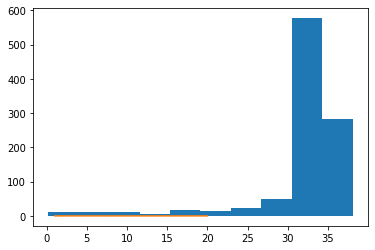

In [134]:
plt.hist(prova)
x_grid= np.linspace(1.,20.,1000)
mu = prior(mu0)
y_obs = tfp.distributions.Normal(mu,5).sample(1000)
n = len(y_obs)
y = target(mu, n, y_obs).sample(1000)  # sample?
#print(y)
plt.plot(x_grid , y)
print(prova)

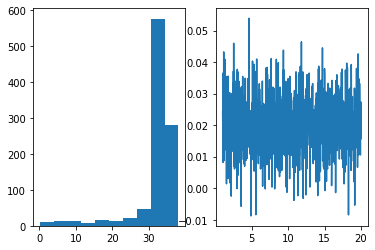

In [140]:
f,axs = plt.subplots(1,2)
axs[0].hist(prova)
axs[1].plot(x_grid , y)

# qualcosa non va in questa y...